<a href="https://colab.research.google.com/github/maxkkessler/CSE-4502-Projects/blob/main/WA3_ANN_%5Bmkk17004%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starter code for Artificial Neural Network assignment.

In [ ]:
# Load the libaries dataset
# When you load the datasets, please select both training and testing files at "Choose Files" and click "Open"
# You could add other necessary libraries here
import pandas as pd
import numpy as np
from google.colab import files

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# If you would like to delete the files uploaded, go to Runtime --> Factory reset runtime
uploaded = files.upload()

Saving validation_data_new_7dim.csv to validation_data_new_7dim.csv
Saving training_data_new_7dim.csv to training_data_new_7dim.csv


In [ ]:
# Read the corresponding csv files
train_set = pd.read_csv("training_data_new_7dim.csv") 
valid_set = pd.read_csv("validation_data_new_7dim.csv") 

# You can try standard scaler instead if you want
min_max_scaler = preprocessing.MinMaxScaler()
train_set = min_max_scaler.fit_transform(train_set)
valid_set = min_max_scaler.fit_transform(valid_set)
train_set = pd.DataFrame(train_set)
valid_set = pd.DataFrame(valid_set)

In [ ]:
# Preview the processed training data
train_set

,0,1,2,3,4,5,6,7
0,0.156250,0.666667,0.416667,0.153846,0.545455,0.416667,0.419355,1.0
1,0.093750,0.629630,0.416667,0.169231,0.545455,0.333333,0.290323,1.0
2,0.171875,0.518519,0.458333,0.138462,0.393939,0.333333,0.322581,1.0
3,0.203125,0.518519,0.125000,0.215385,0.363636,0.194444,0.451613,1.0
4,0.171875,0.333333,0.458333,0.200000,0.363636,0.444444,0.225806,1.0
...,...,...,...,...,...,...,...,...
795,0.531250,0.666667,0.750000,0.492308,0.606061,0.555556,0.483871,0.0
796,0.546875,0.592593,0.708333,0.569231,0.818182,0.722222,0.548387,0.0
797,0.578125,0.740741,0.708333,0.538462,0.757576,0.694444,0.516129,0.0
798,0.546875,0.814815,0.875000,0.569231,0.848485,0.611111,0.741935,0.0


In [ ]:
# Preview the processed validation data
valid_set

,0,1,2,3,4,5,6,7
0,0.169492,0.666667,0.629630,0.220339,0.555556,0.533333,0.50000,1.0
1,0.135593,0.708333,0.407407,0.220339,0.629630,0.500000,0.43750,1.0
2,0.118644,0.791667,0.592593,0.288136,0.703704,0.500000,0.43750,1.0
3,0.118644,0.791667,0.555556,0.237288,0.629630,0.433333,0.28125,1.0
4,0.067797,0.750000,0.370370,0.237288,0.629630,0.466667,0.28125,1.0
...,...,...,...,...,...,...,...,...
195,0.389831,0.416667,0.629630,0.491525,0.000000,0.300000,0.46875,0.0
196,0.338983,0.583333,0.666667,0.508475,0.814815,0.266667,0.59375,0.0
197,0.372881,0.541667,0.629630,0.474576,0.777778,0.233333,0.62500,0.0
198,0.406780,0.541667,0.666667,0.559322,0.740741,0.266667,0.59375,0.0


In [ ]:
train_x,train_y=train_set.iloc[:,0:7],train_set.iloc[:,7]
valid_x,valid_y=valid_set.iloc[:,0:7],valid_set.iloc[:,7]

# Training data
train_x=train_x.to_numpy()
train_y=train_y.to_numpy()
valid_x=valid_x.to_numpy()
valid_y=valid_y.to_numpy()

print(valid_x)
print(valid_y)

[[0.16949153 0.66666667 0.62962963 ... 0.55555556 0.53333333 0.5       ]
 [0.13559322 0.70833333 0.40740741 ... 0.62962963 0.5        0.4375    ]
 [0.11864407 0.79166667 0.59259259 ... 0.7037037  0.5        0.4375    ]
 ...
 [0.37288136 0.54166667 0.62962963 ... 0.77777778 0.23333333 0.625     ]
 [0.40677966 0.54166667 0.66666667 ... 0.74074074 0.26666667 0.59375   ]
 [0.42372881 0.5        0.7037037  ... 0.59259259 0.23333333 0.59375   ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

**Question 2(a)** (10 marks)

In [ ]:
# Your codes go from here
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


#take some of the data to test on
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=109)

#make our model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape= (None, 7)))
model.add(layers.Dense(32, activation='relu'))#Add code here. This is the second layer with 16 nodes and  activation function relu.
model.add(layers.Dense(1, activation='sigmoid')) #Add code here. This is the Third layer with 1 nodes and  activation function sigmoid.

#optimize the model with adam. I dont know why I just choose adam
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#fit the model
history = model.fit(train_x,
                    train_y,
                    epochs=16,
                    batch_size=124,
                    validation_data=(valid_x, valid_y))


_, accuracy = model.evaluate(test_x, test_y)
print("Accuracy is: {} \n\n\n".format(accuracy))


Epoch 1/16
5/5 [==============================] - 1s 103ms/step - loss: 0.6638 - accuracy: 0.9011 - val_loss: 0.6539 - val_accuracy: 0.8350
Epoch 2/16
5/5 [==============================] - 0s 11ms/step - loss: 0.6476 - accuracy: 0.7915 - val_loss: 0.6403 - val_accuracy: 0.6650
Epoch 3/16
5/5 [==============================] - 0s 11ms/step - loss: 0.6365 - accuracy: 0.6813 - val_loss: 0.6282 - val_accuracy: 0.6450
Epoch 4/16
5/5 [==============================] - 0s 11ms/step - loss: 0.6286 - accuracy: 0.6500 - val_loss: 0.6160 - val_accuracy: 0.6600
Epoch 5/16
5/5 [==============================] - 0s 11ms/step - loss: 0.6180 - accuracy: 0.6978 - val_loss: 0.6032 - val_accuracy: 0.7300
Epoch 6/16
5/5 [==============================] - 0s 11ms/step - loss: 0.6007 - accuracy: 0.7853 - val_loss: 0.5881 - val_accuracy: 0.8400
Epoch 7/16
5/5 [==============================] - 0s 11ms/step - loss: 0.5806 - accuracy: 0.8625 - val_loss: 0.5694 - val_accuracy: 0.9350
Epoch 8/16
5/5 [==========

**Question 2(b)** (5 marks)

Epoch 1/16
2/2 [==============================] - 1s 202ms/step - loss: 2.1302 - binary_accuracy: 0.2396 - val_loss: 8.4990 - val_binary_accuracy: 0.5000
Epoch 2/16
2/2 [==============================] - 0s 54ms/step - loss: 6.7348 - binary_accuracy: 0.5025 - val_loss: 0.6786 - val_binary_accuracy: 0.5000
Epoch 3/16
2/2 [==============================] - 0s 40ms/step - loss: 0.7485 - binary_accuracy: 0.4464 - val_loss: 0.7578 - val_binary_accuracy: 0.5000
Epoch 4/16
2/2 [==============================] - 0s 48ms/step - loss: 0.6895 - binary_accuracy: 0.5385 - val_loss: 0.5663 - val_binary_accuracy: 0.7700
Epoch 5/16
2/2 [==============================] - 0s 45ms/step - loss: 0.5381 - binary_accuracy: 0.7722 - val_loss: 0.4626 - val_binary_accuracy: 0.7950
Epoch 6/16
2/2 [==============================] - 0s 51ms/step - loss: 0.5755 - binary_accuracy: 0.6855 - val_loss: 0.4732 - val_binary_accuracy: 0.9700
Epoch 7/16
2/2 [==============================] - 0s 45ms/step - loss: 0.4458 - b

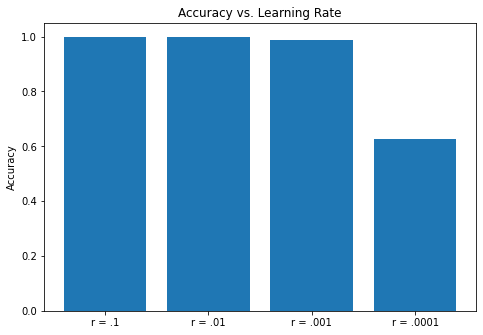

In [ ]:
# Your codes go from here
r = [.1, .01, .001, .0001]
string_r = ["r = .1", "r = .01", "r = .001", "r = .0001"]
accuracy = []
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=109)

for rate in r:
  #take some of the data to test on

  #make our model
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape= (None, 7)))
  model.add(layers.Dense(32, activation='relu'))#Add code here. This is the second layer with 16 nodes and  activation function relu.
  model.add(layers.Dense(1, activation='sigmoid')) #Add code here. This is the Third layer with 1 nodes and  activation function sigmoid.

  #optimize the model with adam. I dont know why I just choose adam
  model.compile(optimizer=optimizers.RMSprop(lr=rate),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
  
  #fit the model
  history = model.fit(train_x,
                      train_y,
                      epochs=16,
                      batch_size=124,
                      validation_data=(valid_x, valid_y))


  _, a = model.evaluate(test_x, test_y)
  accuracy.append(a)
  

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(string_r,accuracy)
ax.set_title("Accuracy vs. Learning Rate")
ax.set_ylabel("Accuracy")
plt.show()



**Question 2(c)** (10 marks)

Epoch 1/32
1/1 [==============================] - 1s 651ms/step - loss: 0.7214 - accuracy: 0.3333 - val_loss: 0.6646 - val_accuracy: 0.5000
Epoch 2/32
1/1 [==============================] - 0s 43ms/step - loss: 0.7168 - accuracy: 0.3333 - val_loss: 0.6641 - val_accuracy: 0.5000
Epoch 3/32
1/1 [==============================] - 0s 45ms/step - loss: 0.7124 - accuracy: 0.3333 - val_loss: 0.6637 - val_accuracy: 0.5000
Epoch 4/32
1/1 [==============================] - 0s 41ms/step - loss: 0.7083 - accuracy: 0.3333 - val_loss: 0.6634 - val_accuracy: 0.5000
Epoch 5/32
1/1 [==============================] - 0s 45ms/step - loss: 0.7044 - accuracy: 0.3333 - val_loss: 0.6634 - val_accuracy: 0.5000
Epoch 6/32
1/1 [==============================] - 0s 45ms/step - loss: 0.7005 - accuracy: 0.3333 - val_loss: 0.6634 - val_accuracy: 0.5050
Epoch 7/32
1/1 [==============================] - 0s 51ms/step - loss: 0.6968 - accuracy: 0.3333 - val_loss: 0.6636 - val_accuracy: 0.5100
Epoch 8/32
1/1 [==========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1/1 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.6667


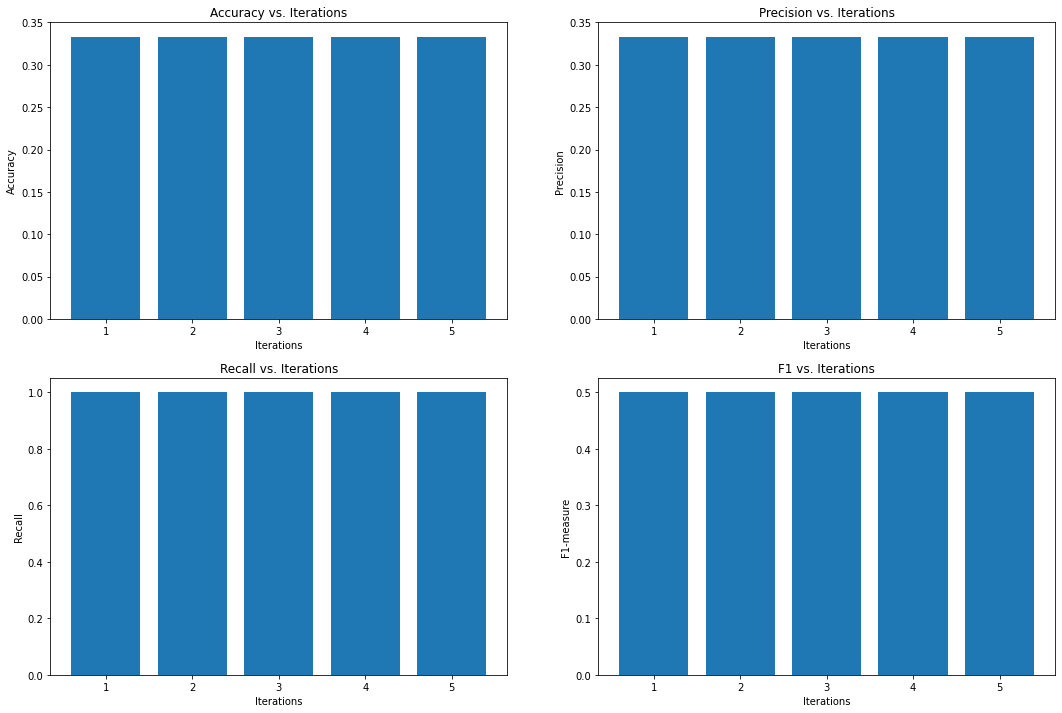

In [ ]:
# Your codes go from here
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#take some of the data to test on
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=109)

#make our model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape= (None, 7)))
model.add(layers.Dense(32, activation='relu'))#Add code here. This is the second layer with 16 nodes and  activation function relu.
model.add(layers.Dense(1, activation='sigmoid')) #Add code here. This is the Third layer with 1 nodes and  activation function sigmoid.

#optimize the model with adam. I dont know why I just choose adam
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#fit the model
history = model.fit(train_x,
                    train_y,
                    epochs=32,
                    batch_size=124,
                    validation_data=(valid_x, valid_y))

accuracy = []
precision = []
recall = []
f1 = []

for e in range(5):
  history = model.fit(train_x, train_y, epochs=1, batch_size=124)
  pred = model.predict_classes(test_x)
  pred = pred[:, 0]
  accuracy.append(accuracy_score(test_y, pred))
  precision.append(precision_score(test_y, pred))
  recall.append(recall_score(test_y, pred))
  f1.append(f1_score(test_y, pred))


iterations = ["1", "2", "3", "4", "5"]
plt.figure(1, figsize=(18, 12))

plt.subplot(221)
plt.bar(iterations,accuracy)
plt.title("Accuracy vs. Iterations")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")

plt.subplot(222)
plt.bar(iterations,precision)
plt.title("Precision vs. Iterations")
plt.ylabel("Precision")
plt.xlabel("Iterations")

plt.subplot(223)
plt.bar(iterations,recall)
plt.title("Recall vs. Iterations")
plt.ylabel("Recall")
plt.xlabel("Iterations")

plt.subplot(224)
plt.bar(iterations,f1)
plt.title("F1 vs. Iterations")
plt.ylabel("F1-measure")
plt.xlabel("Iterations")


plt.show()

